In [1]:
import sys
import os

import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from itertools import product

In [2]:
final_result = np.load('schf_fixed_u_filling_vhs_t_4_em4_random_basis_mesh_30_2_2_pmap_over_v1_v2.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

v1_arr = final_result['v1']
v2_arr = final_result['v2']
v1_mesh, v2_mesh = np.meshgrid(v1_arr, v2_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.46565799780366696)

In [4]:
np.max(final_e_difference)

np.float64(0.0010287515268836422)

In [5]:
np.all(np.logical_not(any_bi_fail))

np.True_

### Some points do not converge

In [6]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [7]:
index_c_diff

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 

In [8]:
final_c_difference[index_c_diff]

array([2.48725469e-01, 2.48725469e-01, 2.48725469e-01, 2.48725469e-01,
       2.48725469e-01, 2.48725469e-01, 1.49914161e-01, 2.34823615e-01,
       2.34823615e-01, 2.34823615e-01, 2.34823615e-01, 2.34823615e-01,
       2.34823615e-01, 2.09011168e-01, 2.09011168e-01, 2.09011168e-01,
       2.09011168e-01, 2.09011168e-01, 2.09011168e-01, 1.01219756e-01,
       1.01219756e-01, 1.01219756e-01, 1.01219756e-01, 1.01219756e-01,
       1.01219756e-01, 1.20166533e-01, 1.20166533e-01, 1.37766027e-01,
       1.37766027e-01, 1.37766027e-01, 1.52375174e-01, 1.52375174e-01,
       1.52375174e-01, 1.52375174e-01, 1.64389898e-01, 1.64389898e-01,
       1.64389898e-01, 1.74226343e-01, 2.28360761e-01, 2.28360761e-01,
       2.28360761e-01, 2.28360761e-01, 2.28360761e-01, 2.28360761e-01,
       1.80015351e-01, 1.80015351e-01, 1.80015351e-01, 1.80015351e-01,
       1.80015351e-01, 1.80015351e-01, 8.35953449e-02, 8.35953449e-02,
       8.35953449e-02, 8.35953449e-02, 8.35953449e-02, 8.35953449e-02,
      

### Phase Analysis

In [9]:
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d
from functions_parameters.universal_parameters import pauli_matrices

translation_a1 = np.kron(np.array([[0,0,1,0],
                           [0,0,0,1],
                           [1,0,0,0],
                           [0,1,0,0]]), np.eye(3))
translation_a2 = np.kron(np.array([[0,1,0,0],
                           [1,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0]]), np.eye(3))
c_6_uc = np.array([[0,0,1],
                   [1,0,0],
                   [0,1,0]])
c_3_uc = c_6_uc@c_6_uc
c_2_uc = c_6_uc @ c_3_uc
c_6_2uc = np.zeros((12, 12))
c_6_2uc[0, 2] = 1
c_6_2uc[1, 6] = 1
c_6_2uc[2, 7] = 1
c_6_2uc[3, 8] = 1
c_6_2uc[4, 0] = 1
c_6_2uc[5, 1] = 1
c_6_2uc[6, -1] = 1
c_6_2uc[7, 3] = 1
c_6_2uc[8, 4] = 1
c_6_2uc[9, 5] = 1
c_6_2uc[10, -3] = 1
c_6_2uc[11, -2] = 1

c_6_2uc = np.moveaxis(np.reshape(c_6_2uc, (2, 2, 3, 2, 2, 3)), (0, 3), (1, 4)).reshape(12, 12)
c_3_2uc = c_6_2uc @ c_6_2uc
c_2_2uc = c_3_2uc @ c_6_2uc

In [10]:
from functions_parameters.tools import array_print

In [11]:
array_print(c_6_2uc)

Array = [
     0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00, 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    , 

In [12]:
# try define a translated rotation symmetry check operator such that we can check if the phase is genuine stripe orders.
c_6_2uc_gamma = np.zeros((12, 12))
c_6_2uc_gamma[1, 0] = 1
c_6_2uc_gamma[2, 1] = 1
c_6_2uc_gamma[6, 2] = 1
c_6_2uc_gamma[7, 3] = 1
c_6_2uc_gamma[8, 4] = 1
c_6_2uc_gamma[0, 5] = 1
c_6_2uc_gamma[10, 6] = 1
c_6_2uc_gamma[11, 7] = 1
c_6_2uc_gamma[3, 8] = 1
c_6_2uc_gamma[4, 9] = 1
c_6_2uc_gamma[5, 10] = 1
c_6_2uc_gamma[9, 11] = 1
array_print(c_6_2uc_gamma)

Array = [
     0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
 1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    , 
     0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 

In [13]:
la.norm(np.roll(c_6_2uc, 6, axis=0)-c_6_2uc_gamma)

np.float64(0.0)

In [14]:
c_6_2uc_y=np.zeros((12, 12))
c_6_2uc_y[10, 0] = 1
c_6_2uc_y[11, 1] = 1
c_6_2uc_y[3, 2] = 1
c_6_2uc_y[4, 3] = 1
c_6_2uc_y[5, 4] = 1
c_6_2uc_y[9, 5] = 1
c_6_2uc_y[1, 6] = 1
c_6_2uc_y[2, 7] = 1
c_6_2uc_y[6, 8] = 1
c_6_2uc_y[7, 9] = 1
c_6_2uc_y[8, 10] = 1
c_6_2uc_y[0, 11] = 1

In [15]:
c_6_2uc_y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
c_6_2uc_x=np.zeros((12, 12))
c_6_2uc_x[4, 0] = 1
c_6_2uc_x[5, 1] = 1
c_6_2uc_x[9, 2] = 1
c_6_2uc_x[10, 3] = 1
c_6_2uc_x[11, 4] = 1
c_6_2uc_x[3, 5] = 1
c_6_2uc_x[7, 6] = 1
c_6_2uc_x[8, 7] = 1
c_6_2uc_x[0, 8] = 1
c_6_2uc_x[1, 9] = 1
c_6_2uc_x[2, 10] = 1
c_6_2uc_x[6, 11] = 1

In [17]:
c_3_2uc_gamma = c_6_2uc_gamma @ c_6_2uc_gamma
c_2_2uc_gamma = c_3_2uc_gamma @ c_6_2uc_gamma
c_3_2uc_x = c_6_2uc_x @ c_6_2uc_x
c_2_2uc_x = c_3_2uc_x @ c_6_2uc_x
c_3_2uc_y = c_6_2uc_y @ c_6_2uc_y
c_2_2uc_y = c_3_2uc_y @ c_6_2uc_y


In [18]:
ts_charge_test_phase = ['', '1*2 CDW', '2*2 CDW']
ts_m_test_phase = [' ', ' 1*2 SDW', ' 2*2 SDW']
nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']

phase_list_final = list(i+j+m+n for i,j,m,n in product(ts_charge_test_phase, ts_m_test_phase, nematic_phase, Magnetism_phase))

In [19]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [20]:
phase_diagram_based_on_d = np.zeros((v1_mesh.shape))

threshold = 1E-2
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_recording_c = np.zeros((3))
        ts_recording_s = np.zeros((3))
        rs_recording = np.zeros((4))
        m_recording = np.zeros((4))
        translation_a1_diff_c, translation_a2_diff_c, translation_a1_diff_m, translation_a2_diff_m = translation_check_d(d_ij, translation_a1, translation_a2)
        if translation_a1_diff_c<threshold and translation_a2_diff_c<threshold:
            ts_recording_c[0] = 1
        elif translation_a1_diff_c>threshold and translation_a2_diff_c>threshold:
            ts_recording_c[-1] = 1
        else:
            ts_recording_c[1] = 1
        if translation_a1_diff_m<threshold and translation_a2_diff_m<threshold:
            ts_recording_s[0] = 1
        elif translation_a1_diff_m>threshold and translation_a2_diff_m>threshold:
            ts_recording_s[-1] = 1
        else:
            ts_recording_s[1] = 1
        if ts_recording_c[0]+ts_recording_s[0]>1.5:
            d_ij = d_ij[:,:3]
            c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        else:
            c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
            c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
            c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
            c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
            c6_diff = np.min(np.abs(np.array([c6_diff, c6_diff_x, c6_diff_y, c6_diff_gamma])))
            c3_diff = np.min(np.abs(np.array([c3_diff, c3_diff_x, c3_diff_y, c3_diff_gamma])))
            c2_diff = np.min(np.abs(np.array([c2_diff, c2_diff_x, c2_diff_y, c2_diff_gamma])))
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        else:
            rs_recording[3] = 1
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
                m_recording[1] = 1
            else:
                net_m = np.sum(np.real(magnetism_arr))
                if np.abs(net_m) <= threshold:
                    m_recording[3] = 1
                else:
                    m_recording[2] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(ts_recording_c,ts_recording_s)
        phase_arr = np.kron(phase_arr,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        
        phase_diagram_based_on_d[i,j]=phase

Text(0.5, 1.0, 'filling = 0.8')

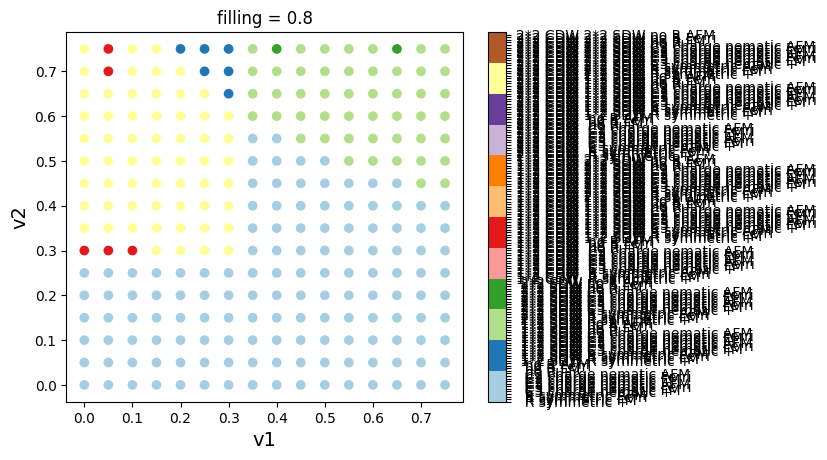

In [21]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(v1_mesh, v2_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 0.8')

In [22]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

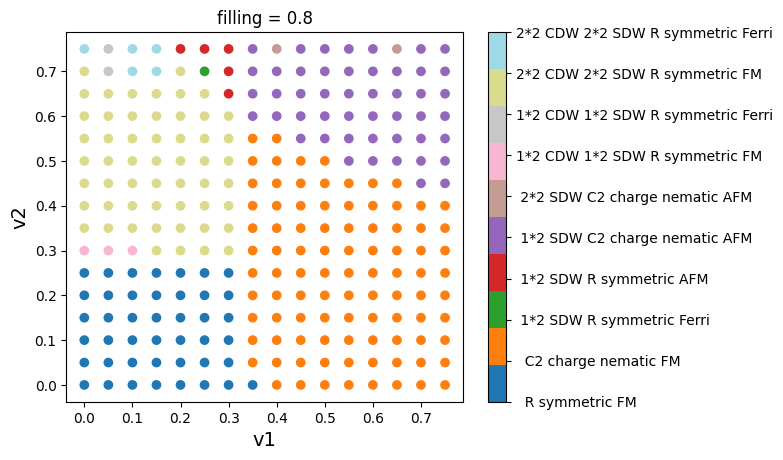

In [23]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, v2_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [24]:
sorted_density[6,6,0,0] - sorted_density[6,6,0,1]

array([0.24278159-1.03758312e-19j, 0.27325861-1.97401127e-21j,
       0.2839598 +2.03723462e-19j, 0.2839598 +3.34345492e-19j,
       0.27325861+1.77189095e-19j, 0.24278159-1.25919398e-19j,
       0.2839598 +3.91569303e-20j, 0.27325861+1.82351643e-20j,
       0.24278159+9.65993686e-20j, 0.24278159+2.14987802e-19j,
       0.27325861-1.49175541e-20j, 0.2839598 +1.38730694e-19j])

In [25]:
sorted_density[6,6,0,0] + sorted_density[6,6,0,1]

array([0.24278159-1.03758312e-19j, 0.27325861-1.97401127e-21j,
       0.2839598 +2.03723462e-19j, 0.2839598 +3.34345492e-19j,
       0.27325861+1.77189095e-19j, 0.24278159-1.25919398e-19j,
       0.2839598 +3.91569303e-20j, 0.27325861+1.82351643e-20j,
       0.24278159+9.65993686e-20j, 0.24278159+2.14987802e-19j,
       0.27325861-1.49175541e-20j, 0.2839598 +1.38730694e-19j])

Text(0.5, 1.0, 'filling = 0.8')

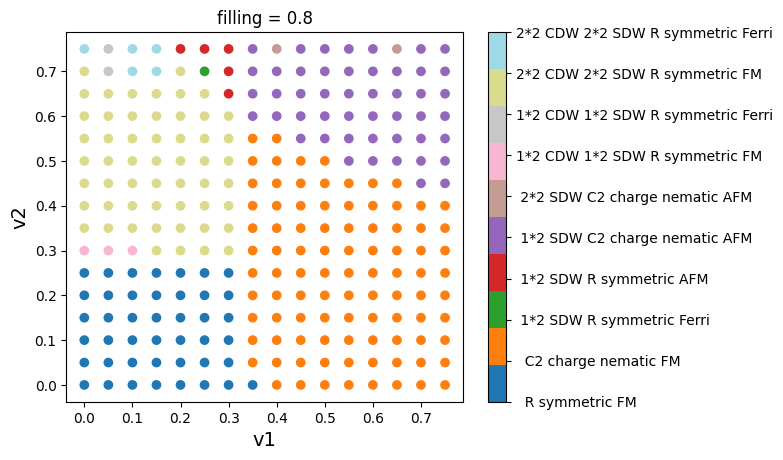

In [26]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, v2_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [27]:
sorted_density[0,1,0,0]+sorted_density[0,1,0,1]

array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
       0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
       0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
       0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
       0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
       0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j])

In [28]:
c_6_2uc_y@(sorted_density[0,1,0,0]+sorted_density[0,1,0,1])

array([0.26666667+1.58541368e-19j, 0.26666667-1.40386260e-19j,
       0.26666666-2.60648388e-19j, 0.26666667-2.46307863e-21j,
       0.26666667+4.06651888e-21j, 0.26666667-3.23117751e-19j,
       0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
       0.26666666-1.94861455e-19j, 0.26666666-2.94908226e-19j,
       0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j])

In [29]:
la.norm(c_6_2uc_y@(sorted_density[0,1,0,0]+sorted_density[0,1,0,1]) - (sorted_density[0,1,0,0]+sorted_density[0,1,0,1]))

np.float64(1.623172069700726e-08)

In [30]:
rot_symm_m_check_d(sorted_density[0,1,0], c_6_2uc_y, c_3_2uc_y, c_2_2uc_y) 

(np.float64(8.101813886440823e-09),
 np.float64(1.2219144140956928e-08),
 np.float64(1.6203594244146302e-08),
 array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
        0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
        0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
        0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
        0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
        0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j]))

In [31]:
rot_symm_m_check_d(sorted_density[0,1,0], c_6_2uc, c_3_2uc, c_2_2uc) 

(np.float64(8.101824044981498e-09),
 np.float64(1.2326911325022394e-08),
 np.float64(1.6203594244146302e-08),
 array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
        0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
        0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
        0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
        0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
        0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j]))

In [32]:
sorted_density[0,1,0,0]-sorted_density[0,1,0,1]

array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
       0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
       0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
       0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
       0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
       0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j])

In [33]:
TB_index=np.where(filtered_phase_diagram>3)
simplified_phase_diagram = filtered_phase_diagram.copy()
simplified_phase_diagram[TB_index] = 4

simplified_phase_list = unique_phase_name[:4]+['TSB']

In [34]:
from matplotlib.colors import ListedColormap

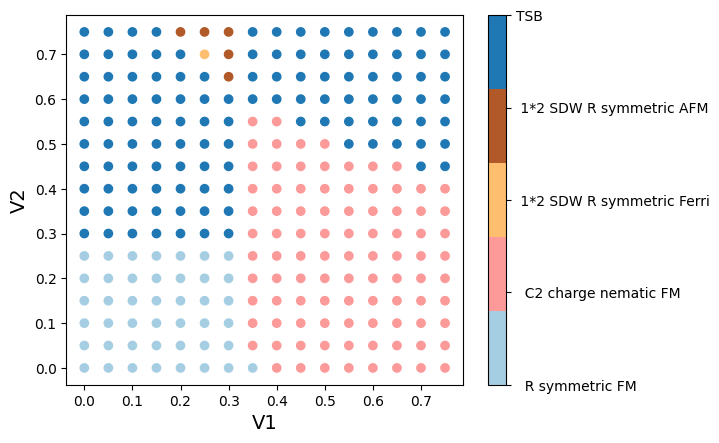

In [ ]:
paired = plt.get_cmap("Paired").colors
corlor_index = [4,6,11,1]
color_list = [paired[i] for i in corlor_index]

cmap = ListedColormap(color_list)
plt.scatter(v1_mesh, v2_mesh, c=simplified_phase_diagram, cmap=cmap)
plt.xlabel('V1', size = '14')
plt.ylabel('V2', size = '14')
colorbar_ticks = np.arange(len(simplified_phase_list))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(simplified_phase_list)))
cbar.set_ticklabels(simplified_phase_list)


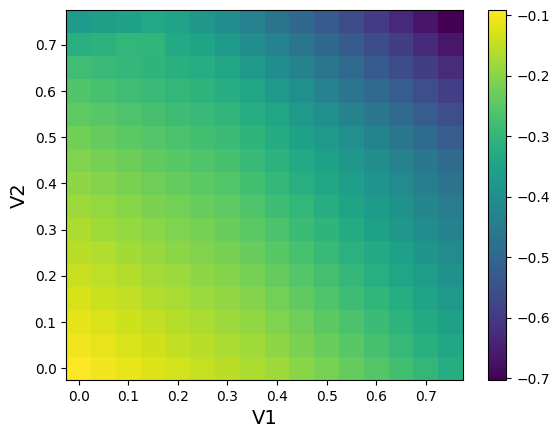

In [36]:
plt.pcolormesh(v1_mesh,v2_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V1', size = '14')
plt.ylabel('V2', size = '14')
plt.colorbar()

In [37]:
np.mean(final_iteration)

np.float64(147.9166015625)

In [38]:
np.max(final_iteration)

np.int32(500)

In [39]:
np.min(final_iteration)

np.int32(4)